In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X, y = data["data"], data["target"]

In [4]:
X.shape

(569, 30)

In [5]:
y.shape

(569,)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [5, 10, 20, 50, 100, 150]}]

knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_clf, knn_param_grid, cv=10, verbose=3)
knn_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.978, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.978, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.891, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.870, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.957, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_neighbors=5, weights=uniform, score=0.978, total=   0.0s
[CV] n_neighbors=5, weights=uniform ..................................
[CV] ...... n_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... n_neighbors=20, weights=uniform, score=0.870, total=   0.0s
[CV] n_neighbors=20, weights=uniform .................................
[CV] ..... n_neighbors=20, weights=uniform, score=0.848, total=   0.0s
[CV] n_neighbors=20, weights=uniform .................................
[CV] ..... n_neighbors=20, weights=uniform, score=0.978, total=   0.0s
[CV] n_neighbors=20, weights=uniform .................................
[CV] ..... n_neighbors=20, weights=uniform, score=0.978, total=   0.0s
[CV] n_neighbors=20, weights=uniform .................................
[CV] ..... n_neighbors=20, weights=uniform, score=0.911, total=   0.0s
[CV] n_neighbors=20, weights=uniform .................................
[CV] ..... n_neighbors=20, weights=uniform, score=0.867, total=   0.0s
[CV] n_neighbors=20, weights=uniform .................................
[CV] ..... n_neighbors=20, weights=uniform, score=0.911, total=   0.0s
[CV] n_neighbors=20, weights=uniform .................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.6s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [5, 10, 20, 50, 100, 150],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [8]:
print(knn_grid_search.best_params_)
print(knn_grid_search.best_score_)

{'n_neighbors': 10, 'weights': 'distance'}
0.9251207729468598


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
knn_y_pred = knn_grid_search.predict(X_test)
print(accuracy_score(y_test, knn_y_pred))
print(precision_score(y_test, knn_y_pred))
print(recall_score(y_test, knn_y_pred))
print(f1_score(y_test, knn_y_pred))

0.956140350877193
0.9459459459459459
0.9859154929577465
0.9655172413793103


In [10]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_cm

array([[39,  4],
       [ 1, 70]])

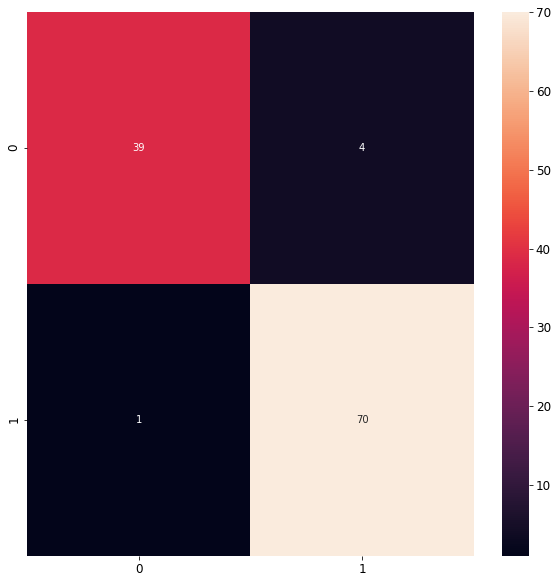

In [11]:
import seaborn as sn
import pandas as pd
plt.figure(figsize = (10,10))
sn.heatmap(knn_cm, annot=True)

In [12]:
from sklearn.metrics import roc_curve

knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_pred)

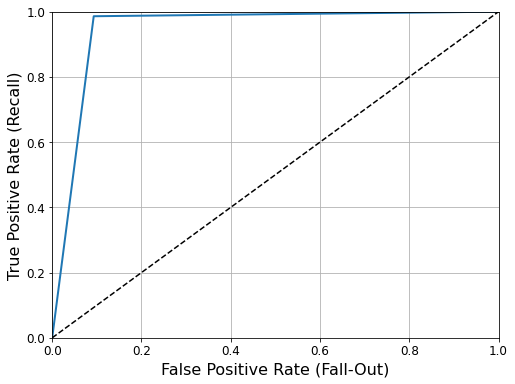

In [13]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(knn_fpr, knn_tpr)
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, knn_y_pred)

0.9464461185718965

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = [{'criterion': ["gini", "entropy"], 'n_estimators': [5, 10, 20, 50, 100, 200]}]

rf_clf = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=10, verbose=3)
rf_grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] criterion=gini, n_estimators=5 ..................................
[CV] ...... criterion=gini, n_estimators=5, score=1.000, total=   0.0s
[CV] criterion=gini, n_estimators=5 ..................................
[CV] ...... criterion=gini, n_estimators=5, score=0.978, total=   0.0s
[CV] criterion=gini, n_estimators=5 ..................................
[CV] ...... criterion=gini, n_estimators=5, score=0.957, total=   0.0s
[CV] criterion=gini, n_estimators=5 ..................................
[CV] ...... criterion=gini, n_estimators=5, score=0.935, total=   0.0s
[CV] criterion=gini, n_estimators=5 ..................................
[CV] ...... criterion=gini, n_estimators=5, score=0.935, total=   0.0s
[CV] criterion=gini, n_estimators=5 ..................................
[CV] ...... criterion=gini, n_estimators=5, score=1.000, total=   0.0s
[CV] criterion=gini, n_estimators=5 ..................................
[CV] ...... cr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... criterion=gini, n_estimators=10, score=0.978, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.935, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.978, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.956, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.956, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.956, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.978, total=   0.0s
[CV] criterion=gini, n_estimators=10 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   16.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [16]:
print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)

{'criterion': 'gini', 'n_estimators': 20}
0.9669565217391304


In [17]:
rf_y_pred = rf_grid_search.predict(X_test)
print(accuracy_score(y_test, rf_y_pred))
print(precision_score(y_test, rf_y_pred))
print(recall_score(y_test, rf_y_pred))
print(f1_score(y_test, rf_y_pred))

0.956140350877193
0.9583333333333334
0.971830985915493
0.965034965034965


In [18]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

array([[40,  3],
       [ 2, 69]])

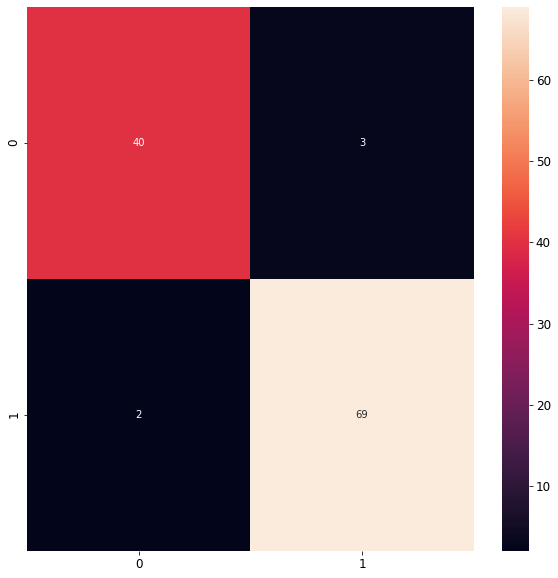

In [19]:
plt.figure(figsize = (10,10))
sn.heatmap(rf_cm, annot=True)

In [20]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_pred)

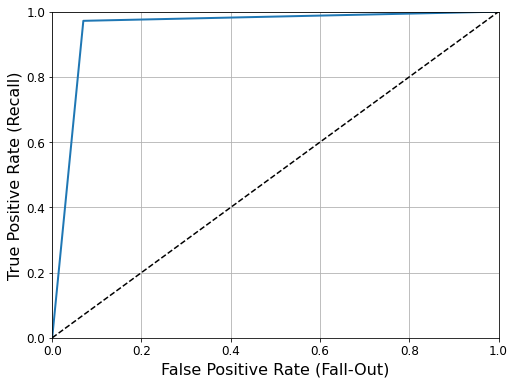

In [21]:
plt.figure(figsize=(8, 6))
plot_roc_curve(rf_fpr, rf_tpr)
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, rf_y_pred)

0.9510317720275139

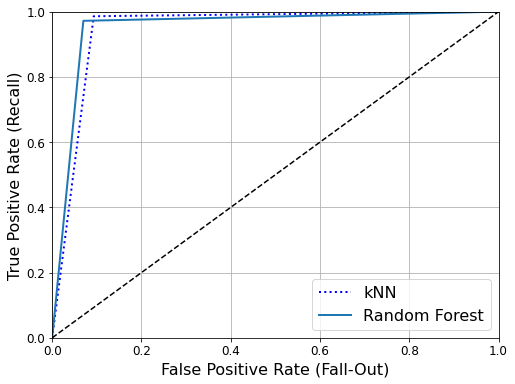

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, "b:", linewidth=2, label="kNN")
plot_roc_curve(rf_fpr, rf_tpr, "Random Forest")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()